In [76]:
# Looking at the Cooler condition as the target:
import pandas as pd
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt



## We only explore the cooler data to monitor its condition:

In [77]:
colNamesCE = []
colNamesCP = []
for i in range(60):
    colNamesCE.append('CE{}'.format(i))
    colNamesCP.append('CP{}'.format(i))

In [78]:
# Load data samples
CE = pd.read_csv('./Hydraulic data/CE.txt', names=colNamesCE, sep="\t", header= None)
CP = pd.read_csv('./Hydraulic data/CP.txt', names=colNamesCP, sep="\t", header= None)


In [79]:
# Load targets:
targets = pd.read_csv('./Hydraulic data/profile.txt',sep="\t", header= None)
targets.columns = ["Cooler cond",
              "Valve cond",
              "Internal pump leakage",
              "Hydraulic accumulator",
              "stable flag"]
targets.head()

y = targets.loc[:,"Cooler cond"]
y.shape

(2205,)

In [80]:
# Concat the samples
samples = pd.concat([CE, CP], axis=1)
dataset = pd.concat([samples,y],axis=1)
dataset.head(1)

,CE0,CE1,CE2,CE3,CE4,CE5,CE6,CE7,CE8,CE9,...,CP51,CP52,CP53,CP54,CP55,CP56,CP57,CP58,CP59,Cooler cond
0,47.202,47.273,47.25,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,1.47,1.458,1.452,1.443,1.449,1.428,1.401,1.402,1.383,3


In [81]:
def splitdataset(dataset): 
  
    # Seperating the target variable 
    Y = dataset.loc[:,'Cooler cond'] 
#    X = dataset.values[:, 0:120] 
    X = dataset.drop(columns='Cooler cond')
  
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size=0.3, random_state=100, shuffle=False) 
      
    return X, Y, X_train, X_test, y_train, y_test 

X, Y, X_train, X_test, y_train, y_test = splitdataset(dataset)

print("Shape of dataset before splitting: ", X.shape)
print("Shape of target before splitting: ", Y.shape)
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of X_test:  ", X_test.shape)
print("Shape of Y_test:  ", y_test.shape)
X_train.head()

Shape of dataset before splitting:  (2205, 120)
Shape of target before splitting:  (2205,)
Shape of X_train:  (1543, 120)
Shape of Y_train:  (1543,)
Shape of X_test:   (662, 120)
Shape of Y_test:   (662,)


,CE0,CE1,CE2,CE3,CE4,CE5,CE6,CE7,CE8,CE9,...,CP50,CP51,CP52,CP53,CP54,CP55,CP56,CP57,CP58,CP59
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,1.509,1.470,1.458,1.452,1.443,1.449,1.428,1.401,1.402,1.383
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,1.170,1.195,1.193,1.179,1.178,1.177,1.152,1.158,1.147,1.164
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,1.101,1.102,1.099,1.099,1.118,1.112,1.116,1.108,1.085,1.103
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,1.096,1.099,1.075,1.088,1.097,1.086,1.101,1.097,1.100,1.091
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,1.094,1.093,1.085,1.087,1.082,1.105,1.101,1.097,1.100,1.106


In [82]:
# Fitting a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_depth=2)
tree = dt_clf.fit(X_train, y_train)

target_names = np.array([3,20,100])
tree_clf

acc_train_tree = dt_clf.score(X_train, y_train)
acc_test_tree = dt_clf.score(X_test, y_test)

print('=================================\n       - DECISION TREE -')

print('\nDecision Tree Accuracy:\nTraining set:\t' 
      + str(acc_train_tree))
print('Test set:\t{0:f}'.format(acc_test_tree))
print('=================================')



       - DECISION TREE -

Decision Tree Accuracy:
Training set:	1.0
Test set:	1.000000


In [96]:
Morten = X['CE0'].iloc[600:800]
X['CE0'].ravel().shape[0]

2205

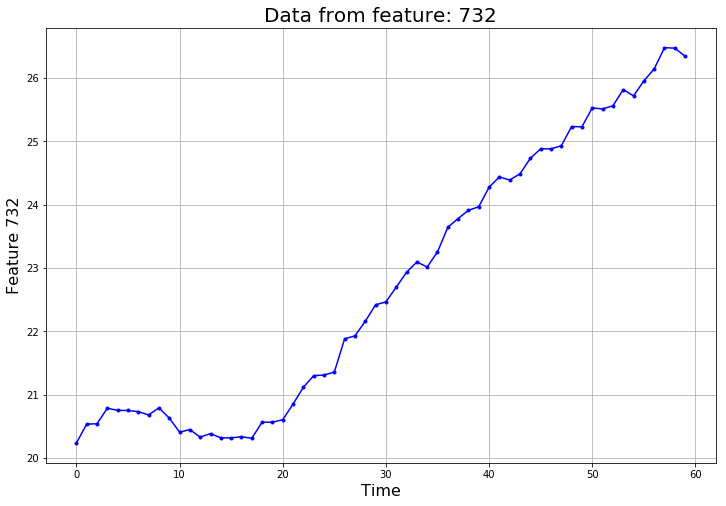

In [115]:
# Plot of what the data sets test_x and test_y actually look like

def plot_data_cycle(x_data, cycle):
    y = x_data.ravel()
    x = np.arange(y.shape[0])

    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    plot = ax.plot(x, y, color='b', marker='.')
    plt.title('Data from feature: {0}'.format(cycle), fontsize=20)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Feature {0}'.format(cycle), fontsize=16)
    plt.grid(True)
    plt.show()
    
cycle = 732
plot_data_cycle(X.loc[cycle, colNamesCE], cycle)


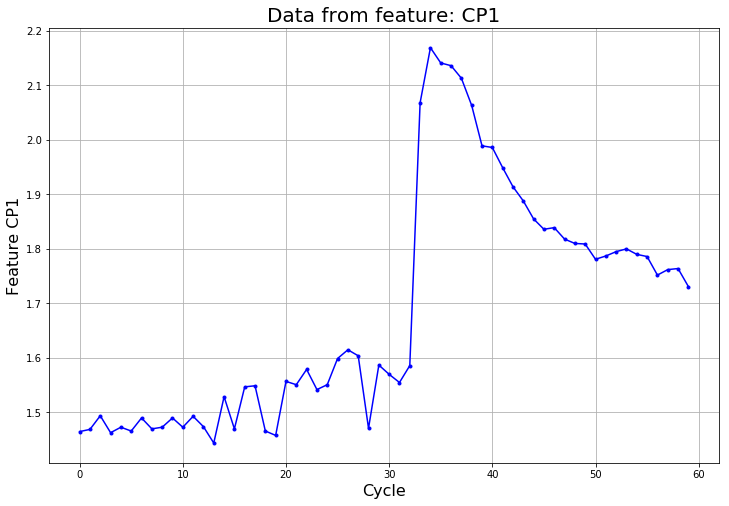

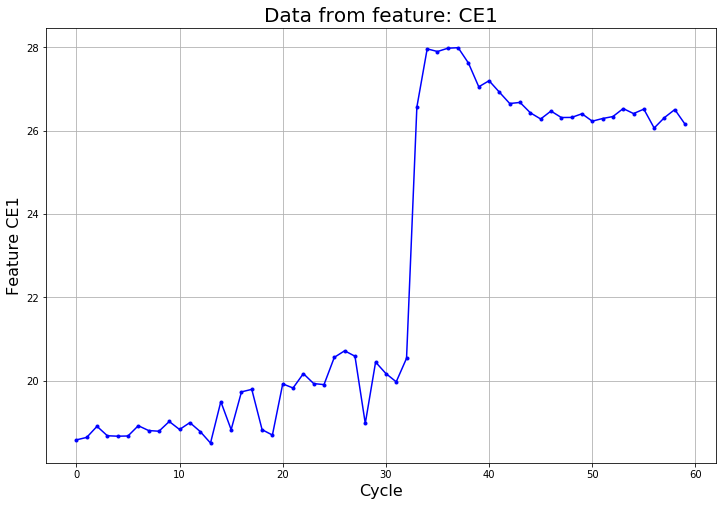

In [113]:
# Plot of what the data sets test_x and test_y actually look like

def plot_data_features(x_data, feature):
    y = x_data.ravel()
    x = np.arange(y.shape[0])

    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    plot = ax.plot(x, y, color='b', marker='.')
    plt.title('Data from feature: {0}'.format(feature), fontsize=20)
    plt.xlabel('Cycle', fontsize=16)
    plt.ylabel('Feature {0}'.format(feature), fontsize=16)
    plt.grid(True)
    plt.show()

feature = 'CP1'
plot_data_features(X[feature].iloc[700:760], feature)
feature = 'CE1'
plot_data_features(X[feature].iloc[700:760], feature)

In [85]:
X

,CE0,CE1,CE2,CE3,CE4,CE5,CE6,CE7,CE8,CE9,...,CP50,CP51,CP52,CP53,CP54,CP55,CP56,CP57,CP58,CP59
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,1.509,1.470,1.458,1.452,1.443,1.449,1.428,1.401,1.402,1.383
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,1.170,1.195,1.193,1.179,1.178,1.177,1.152,1.158,1.147,1.164
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,1.101,1.102,1.099,1.099,1.118,1.112,1.116,1.108,1.085,1.103
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,1.096,1.099,1.075,1.088,1.097,1.086,1.101,1.097,1.100,1.091
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,1.094,1.093,1.085,1.087,1.082,1.105,1.101,1.097,1.100,1.106
5,19.651,19.635,19.533,19.627,19.073,19.202,19.202,19.116,18.652,18.645,...,1.098,1.100,1.100,1.103,1.103,1.103,1.085,1.105,1.105,1.109
6,19.339,19.415,19.040,19.003,18.996,19.033,19.055,18.887,18.881,18.933,...,1.076,1.082,1.079,1.104,1.100,1.077,1.083,1.083,1.074,1.080
7,18.788,18.415,18.426,18.342,18.317,18.372,18.386,18.706,18.670,18.555,...,1.074,1.074,1.098,1.102,1.076,1.082,1.081,1.077,1.079,1.105
8,18.362,18.405,18.405,18.426,18.380,18.480,18.566,18.075,18.340,18.235,...,1.112,1.136,1.134,1.138,1.113,1.111,1.113,1.089,1.094,1.123
9,18.201,18.257,18.312,18.201,18.364,18.108,18.139,18.167,18.234,18.126,...,1.122,1.127,1.121,1.142,1.135,1.141,1.121,1.114,1.113,1.147


## Visualize Decision Tree using graphviz 
(does not work)

In [38]:
from sklearn import tree
from sklearn.tree import export_graphviz


In [39]:
# Visualize Decision Tree

# Creates dot file named tree.dot
export_graphviz(
            tree_clf,
            out_file =  "myTreeName.dot",
            feature_names = list(samples.columns),
            class_names = target_names,
            filled = True,
            rounded = True)

TypeError: can only concatenate str (not "numpy.int64") to str